In [5]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
print(f'Tensorflow {tf.__version__}')

Tensorflow 2.1.0


In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


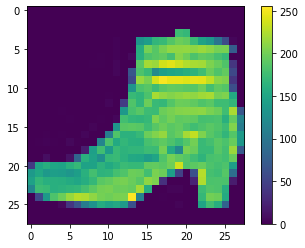

In [19]:
plt.figure()
plt.imshow(train_images[np.random.choice(len(train_images))])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
train_images =  train_images / 255
test_images = test_images / 255

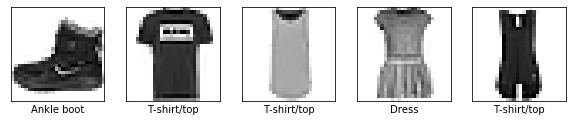

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [43]:
model.compile(optimizer='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [54]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1985 - accuracy: 0.9260

In [55]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/10000 - 0s - loss: 0.3753 - accuracy: 0.8887


In [56]:
prob_model = keras.Sequential([model, 
                               keras.layers.Softmax()
                               ])

In [57]:
model.predict(test_images)[0]

array([-25.566338 , -31.553087 , -26.335327 , -30.572268 , -20.91174  ,
        -5.9903884, -26.626528 ,  -2.2326005, -20.685038 ,   7.375286 ],
      dtype=float32)

In [58]:
prob_preds = prob_model.predict(test_images)
prob_preds[0]

array([4.9386104e-15, 1.2404851e-17, 2.2889526e-15, 3.3079287e-17,
       5.1888496e-13, 1.5679465e-06, 1.7106815e-15, 6.7192086e-05,
       6.5091812e-13, 9.9993122e-01], dtype=float32)

In [59]:
np.argmax(prob_preds[0])

9

In [60]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

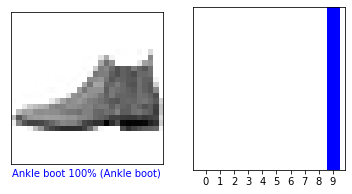

In [61]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prob_preds[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prob_preds[i],  test_labels)
plt.show()

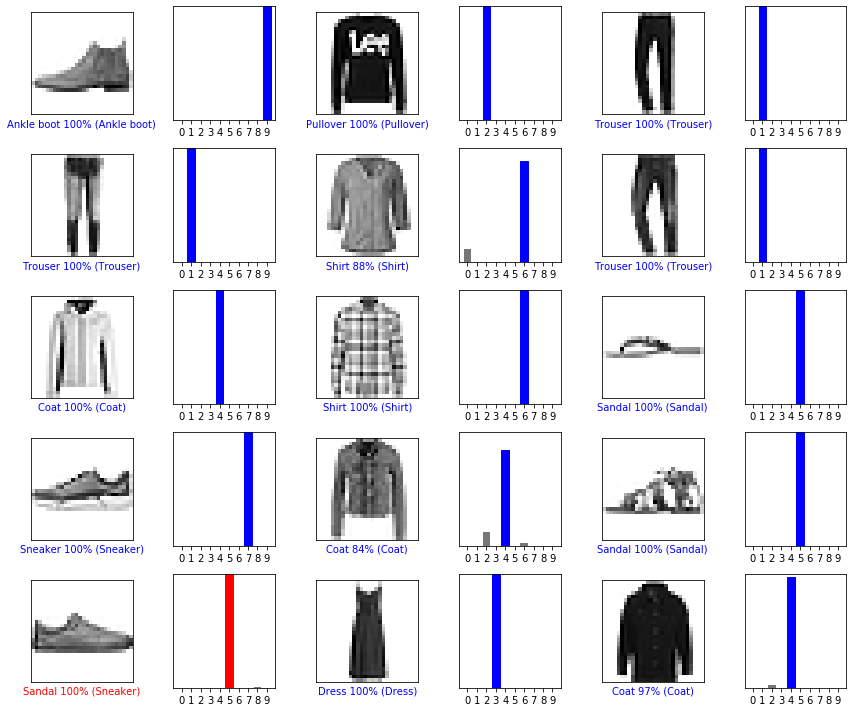

In [62]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prob_preds[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prob_preds[i], test_labels)
plt.tight_layout()
plt.show()